In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [2]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
data.iloc[:,23].fillna(data.iloc[:,23].mean(), inplace=True)
data.iloc[:,10].fillna(data.iloc[:,10].mean(), inplace=True)
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [20]:
data['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [21]:
data = data.drop([ 'company', 'country','agent'], axis=1)

In [22]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})


In [23]:
label_encoder = preprocessing.LabelEncoder()
data['customer_type']= label_encoder.fit_transform(data['customer_type']) 
data['assigned_room_type'] = label_encoder.fit_transform(data['assigned_room_type'])
data['deposit_type'] = label_encoder.fit_transform(data['deposit_type'])
data['reservation_status'] = label_encoder.fit_transform(data['reservation_status'])
data['meal'] = label_encoder.fit_transform(data['meal'])
data['distribution_channel'] = label_encoder.fit_transform(data['distribution_channel'])
data['market_segment'] = label_encoder.fit_transform(data['market_segment'])
data['reserved_room_type'] = label_encoder.fit_transform(data['reserved_room_type'])
data['reservation_status_date'] = label_encoder.fit_transform(data['reservation_status_date'])
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.00,0,0,1,668
1,0,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.00,0,0,1,668
2,0,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.00,0,0,1,701
3,0,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,701
4,0,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.00,0,1,1,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,8,35,30,2,5,2,...,0,0,0,0,2,96.14,0,0,1,916
119386,1,0,102,2017,8,35,31,2,5,3,...,4,0,0,0,2,225.43,0,2,1,919
119387,1,0,34,2017,8,35,31,2,5,2,...,3,0,0,0,2,157.71,0,4,1,919
119388,1,0,109,2017,8,35,31,2,5,2,...,0,0,0,0,2,104.40,0,0,1,919


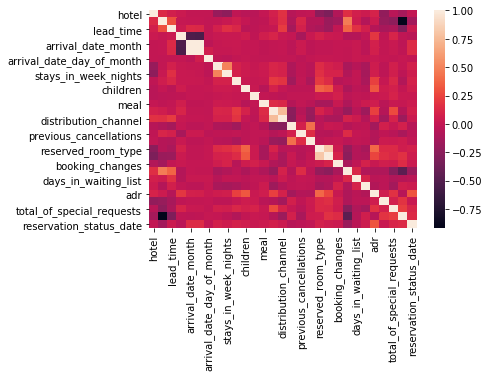

In [24]:
sns.heatmap(data.corr())

In [25]:
X = (data.loc[:, data.columns != 'is_canceled'])
y = (data.loc[:, data.columns == 'is_canceled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X,y)
y_pred= lr.predict(X_test)
print ('Intercept:',lr.intercept_)
print ( 'Coefficients:',lr.coef_)
print('Score',lr.score(X_test,y_test))
print('Root Mean Squared Error_ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

Intercept: [8.27760063]
Coefficients: [[ 1.35120736e-02  3.34045138e-05 -3.66051705e-03  3.60500097e-03
  -1.15589072e-03  4.12199483e-04  5.05148554e-03  1.65374029e-03
  -4.69528941e-03  7.78664700e-03  5.50404462e-03 -1.03311430e-03
   1.00053386e-02 -8.17381435e-03  3.01635290e-03  3.25408502e-03
  -1.00410769e-03  5.74809951e-03 -6.09324002e-03 -8.26765641e-03
   7.18399898e-02 -1.49204293e-04 -3.24754826e-03  1.15637579e-04
  -5.40839167e-02 -1.64126710e-02 -8.46586889e-01 -3.00627715e-05]]
Score 0.837968140862066
Root Mean Squared Error_ridge: 0.195


In [29]:
mlp = MLPClassifier(alpha=0.0001,hidden_layer_sizes=(50,50),activation='logistic',solver='adam',learning_rate='adaptive')
mlp = mlp2.fit(X_train, y_train)
score2=mlp2.score(X_test,y_test)
print('Score',mlp2.score(X_test,y_test))

D:\Users\Xinqiao Chu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score 0.9890694363011977


In [30]:
yPredict1=mlp.predict(X_train)
yPredict2=mlp.predict(X_test)
print(clf.score(X_train,y_train))
print(classification_report(yPredict1,y_train,target_names=['canceled','keep']))
print(clf.score(X_test,y_test))
print(classification_report(yPredict2,y_test,target_names=['canceled','keep']))

1.0
              precision    recall  f1-score   support

    canceled       1.00      0.98      0.99     61171
        keep       0.97      1.00      0.99     34341

    accuracy                           0.99     95512
   macro avg       0.99      0.99      0.99     95512
weighted avg       0.99      0.99      0.99     95512

1.0
              precision    recall  f1-score   support

    canceled       1.00      0.98      0.99     15189
        keep       0.97      1.00      0.99      8689

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878

